In [ ]:
# Load packages
import numpy as np
import matplotlib.pyplot as plt

# Initial values
v0 = 20
z0 = 100
g = 9.81

### Firecracker

A firecracker explodes at a height of 100 m above level ground. It breaks into a large number of very small fragments, which move in every direction; all of them have the same initial velocity of 20 m/s.

We assume that the fragments move without air resistance, in a uniform gravitational field with $g = 9.81~\mathrm{m/s^2}$.

**Problem:**  
Find the volume (in $\mathrm{m^3}$) of the region through which the fragments move before reaching the ground. Give your answer rounded to four decimal places.

---

Let's first make a visualization of the problem before jumping directly  into the resolution. Consider the firecracker along the $z$-axis at position $(0, 0, z_0)$. We know from basic physics dynamics that a free particle with initial velocity $v_0$, horizontal angle $\alpha$, and under a gravitational field $g = 9.81~\mathrm{m/s^2}$, is going to follow a parabolic trajectory until it reaches the ground as the figure below shows:

<p align="center">
    <img src="./figs/trajectory.svg" alt="Trajectory Diagram" width="50%"/>
</p>

Our problem needs to consider not just one, but all the possible trajectories for every direction of the fragments that blow up. As the fragments go to every direction evenly, there is a cylindrical symmetry in this problem: this is, the set of trajectories has symmetry along the $z$-axis.

Therefore, the problem greatly ease in difficulty if we just focus on a mid-section of the volume we want to compute. More precisely, we just want to put the eye on the region

$$x \ge 0, \quad y = 0, \quad z \geq 0$$

and look how the trajectories delimit this volume.

Indeed, if we draw a bunch of trajectories on this region, one can be convinced that this set of curves fully fills an area which represents the section of our volume. To see this, the figure below colors in red the contour that the union of this set of curves form when we plot varios directions: 

<p align="center">
    <img src="./figs/trajectories.svg" alt="Trajectories Diagram" width="50%"/>
</p>

Therefore, the volume can be obtained the following way:
- We first find the area below the contour that delimits the curves on the region defined before. This is, to find the area below the red curve.
- As there is cylindrical symmetry, we just have to multiply the previos area with $2\pi$ to obtain the value of the volume.

Once we have visualized the problem we can go now though the solution.

#### Solution

We may first star obtaining the expression of the trajectories the fragments follow for a given direction $\alpha$.

The initial velocity is decomposed in two components:

$$v_0 = 20~\mathrm{m/s} \longrightarrow
\begin{cases}
v_x(0) = v_0 \cos{\alpha} \\
v_z(0) = v_0 \sin{\alpha}
\end{cases}$$

As well as the movement of the fragments:

$$x = x_0 + v_x(0)t, \quad z = z_0 + v_z(0)t - \frac{1}{2} g t^2$$

Eliminating the time variable $t$ we can obtain the trajectories,

$$z = z(x, \alpha) = z_0 + \tan{\alpha}~x - \frac{g}{2v_0^2}(1 + \tan^2{\alpha})x^2$$

Let's analyze the domain of the trajectories, now written as a function of $x$ and $\alpha$:

-  We want to restrict our set of curves to the ones with directions $\alpha \in [0, \pi/2)$. This is because the values between $(-\pi/2, 0)$ point directly to the ground, and the trajectories do not reach any further than the ones between $[0, \pi/2)$. Therefore, the contour of the surface (red curve) is just formed by the trajectories in the domain $\alpha \in [0, \pi/2)$.

- For a given direction $\alpha$ the trajectory is defined for the $x$ values between $[0, X(\alpha)]$, where $X(\alpha)$ is the maximum horizontal distance until the fragment reaches the ground (different for every $\alpha$ direction). Similarly, we can call $Z(\alpha)$ to the maximum vertical distance that the fragment reaches during the trajectory.

The maximum distance $Z(\alpha)$ is easy to obtain, imposing that the final velocity at this point is zero (this condition only holds if $\alpha \in [0, \pi/2)$):

$$Z(\alpha) = z_0 + \frac{v_0^2}{2g} \sin^2{\alpha}, \quad \alpha \in [0, \pi/2)$$

On the other hand, $X(\alpha)$ is little bit more tricky:
- We can obtain its expression taking the positive root of the cuadratic equation defined by the trajectory $z(x, \alpha)$.
- However it is more handy to simplify the previous expression and replacing $Z(\alpha)$ where we can. This yields to,
$$X(\alpha) = \frac{v_0^2\sin{\alpha}~\cos{\alpha}}{g} \left( 1 + \sqrt{\frac{Z(\alpha)}{Z(\alpha) - z_0}}\right),\quad \alpha \in [0, \pi/2)$$

We are now on good condition to find the contour of the surface. Let's call $f(x)$ the curve that defines the contour that delimits the trajectories (the red curve we talked about before). How do we find its expression?? If we could so, it would be easy to integrate its expression and obtain the area under the curve.

One way of doing this is to use the trajectory function $z(x, \alpha)$. For a fixed position $x$, one can raise a vertical line that will cross varios trajectories at certain points. Of course, it will also cross the curve $f(z)$ that delimits the trajectories, and this would we the very last curve that the vertical line will encounter with. This is schematically represented in the following figure:

<p align="center">
    <img src="./figs/contour.svg" alt="Contour Diagram" width="50%"/>
</p>

By this reasoning, what we would have to do is maximize the function $z(x, \alpha)$ with respect to $\alpha$ and for a given position $x$, to obtain the value $f(x)$:

$$f(x) = \max_{\alpha} \left\{z(x, \alpha) \right\}$$

So, how do we maximize this function?? First, we shall represent it graphically for given positions and analyze how to approach to this maximum

##### Obtaining the function $f(x)$

Recall the function that gave us the trajectory of the fragments in terms of $x$ and $\alpha$:

$$z(x, \alpha) = z_0 + \tan{\alpha}~x - \frac{g}{2v_0^2}(1 + \tan^2{\alpha})x^2$$

We want to draw the graphic of $z(x, \alpha)$ for a fixed position $x$. Take into account that the trajectories are defined in the region $x \in (0, X(\alpha)]$, so it does not make sense to draw trajectories outside of this range. To facilitate the plot of the trajectories, we can first calculate the maximum distance $X_{max}$ that any trajectory can reach: this is, to maximize the function $X(\alpha)$. 

The graphic of $X(\alpha)$ is the following:

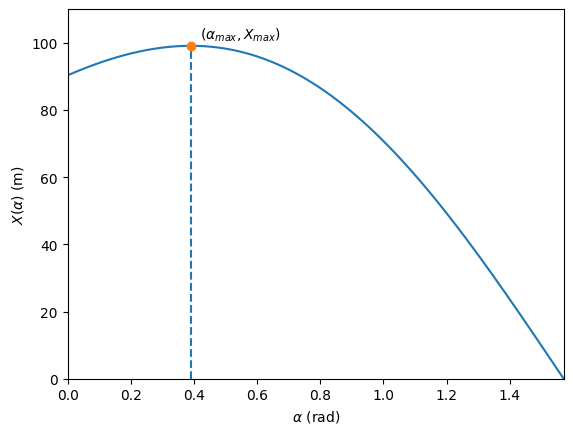

In [17]:
# Define functions of X and Z
def Z_func(a):
    return z0 + (v0*np.sin(a))**2 / (2*g)

def X_func(a):
    return v0**2*np.sin(a)*np.cos(a)*(1 + np.sqrt(Z_func(a) / (Z_func(a) - z0))) / g

# Plot points
ap = np.linspace(0, np.pi/2, int(1e4))
ap = ap[1:] # Not include 0 (undetermined)
Xp = X_func(ap)

# Draw X graphic
plt.plot(ap, Xp)

# Draw max point
a_max = ap[np.argmax(Xp)]
X_max = np.max(Xp)
plt.vlines(a_max, ymin=0, ymax=X_max, linestyle="--")
plt.plot(a_max, X_max, "o")

# Texts
a_eps, X_eps = 3e-2, 2
plt.text(a_max + a_eps, X_max + X_eps, s=r"$(\alpha_{max}, X_{max})$")

plt.xlim(left=0, right=np.pi/2)
plt.ylim(bottom=0, top=110)
plt.ylabel(r"$X(\alpha)~(\mathrm{m})$")
plt.xlabel(r"$\alpha~(\mathrm{rad})$")
plt.show()

As we can see, there is a trajectory with some angle $\alpha_{max}$ that have the maximum horizontal distance $X_{max} = X(\alpha_{max})$ among all other trajectories. We have calculated this values for the plot, but they are not precise. Fortunately, this is not very important for calculation of $f(x)$, so we give the approximate values anyways

In [18]:
print(f"Maximum point of X: (a_max = {a_max:.3f}, X_max = {X_max:.3f})")

Maximum point of X: (a_max = 0.390, X_max = 99.083)


This value is useful to the delimit the final plot for trajectories. Another aspect that we to take into account is that, for a given position $x$, not all the trajectories (with a certain direction $\alpha$) can reach that distance. So the $\alpha$ domain depends on the position $x$: this is, for a given $x$, we can only draw the trajectories with direction $\alpha \in [0, \Alpha(x)]$ so that $X(\alpha) \geq x$. Here is an example that plot the $\alpha$ values that we could draw for a given $x$:

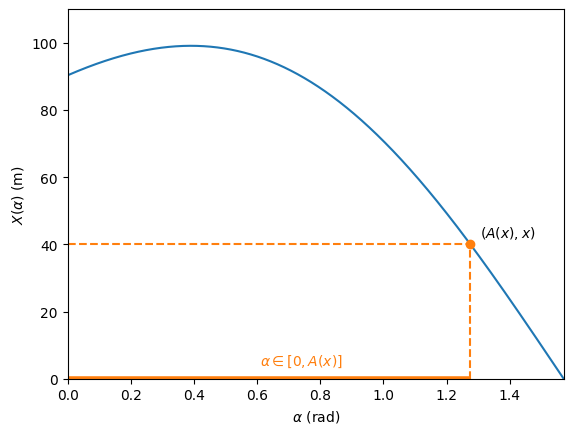

In [19]:
# Plot points
ap = np.linspace(0, np.pi/2, int(1e4))
ap = ap[1:] # Not include 0 (undetermined)
Xp = X_func(ap)

# Draw X graphic
plt.plot(ap, Xp)

# Certain fixed x value
x_exp = 40
diff = (Xp - x_exp)
A_exp = ap[diff >= 0][-1]
plt.hlines(x_exp, 0, A_exp, linestyle="--", color="tab:orange")
plt.hlines(0, 0, A_exp, color="tab:orange", linewidth=4)
plt.vlines(A_exp, 0, x_exp, linestyle="--", color="tab:orange")
plt.plot(A_exp, x_exp, "o")

# Texts
a_eps, X_eps = 3e-2, 2
plt.text(A_exp + a_eps, x_exp + X_eps, s="$(A(x), x)$")
plt.text(A_exp/2-a_eps, 2*X_eps, s=r"$\alpha \in [0, A(x)]$", color="tab:orange")


plt.xlim(left=0, right=np.pi/2)
plt.ylim(bottom=0, top=110)
plt.ylabel(r"$X(\alpha)~(\mathrm{m})$")
plt.xlabel(r"$\alpha~(\mathrm{rad})$")
plt.show()

The given $x$ is draw as a horizontal orange line. This line would have an intersection with curve $X(\alpha)$ at point $(A(x), x)$ (see figure above). The set of curves that can reach this distance $x$ are the ones whose direction falls in the orange interval: this directions satisfies that $X(\alpha) \geq x$.

Taking all this into account, we can now draw the graphic of $z(x, \alpha)$ for different $x$ values:

(0.0, 130.0)

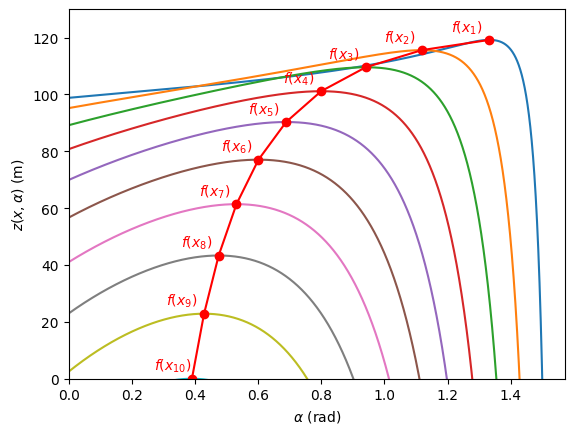

In [20]:
# Define the function of the trajectory
def z_func(x, a):
    return z0 + np.tan(a)*x - g*(1 + np.tan(a)**2)*x**2 / (2*v0**2)

# Plot points
xp = np.linspace(0, X_max, 11)
ap = np.linspace(0, np.pi/2, int(1e5))
xp, ap = xp[1:], ap[1:]
zp = z_func(xp, ap[:, np.newaxis])

# # Draw the graphic
plt.plot(ap, zp)

# Draw maximums
zp_max = np.max(zp, axis=0)
ap_max = ap[np.argmax(zp, axis=0)]
plt.plot(ap_max, zp_max, "o-", color="red")

# Texts
a_eps, z_eps = 1e-1, 3 
k = 1
for a_max, z_max in zip(ap_max, zp_max):
    plt.text(a_max - 1.2*a_eps, z_max + z_eps, s=fr"$f(x_{{{k}}})$", color="red")
    k += 1
# Labels
plt.xlabel(r"$\alpha~(\mathrm{rad})$")
plt.ylabel(r"$z(x, \alpha)~(\mathrm{m})$")

# Limits
plt.xlim(0, np.pi/2)
plt.ylim(bottom=0, top=130)

The maximums of this curves is what we are looking for, which are the values of the curve $f(x)$. We can see that there is only one single maximum for every curve that we can consider fixing $x$. This means that we can take the partial derivative $\partial z/\partial \alpha$ and maximize with respect to $\alpha$ by solving for the single root of this derivative:

$$\frac{\partial z}{\partial \alpha} (x, \alpha) = 0$$

Doing so one obtains the angle $\alpha_{max}(x)$ which maximizes $z(x, \alpha)$ at position $x$. Its expression is:

$$\alpha_{max}(x) = \arctan \left(\frac{v_0^2}{gx}\right)$$

We can now substitute this value in $z(x, \alpha)$ to obtain the curve $f(x)$ which yields:

$$f(x) = z(x, \alpha) |_{\alpha = \alpha_{max}(x)} = z_0 + \frac{v_0^2}{g} - \frac{g}{2v_0^2}\left(1 + \left(\frac{v_0^2}{gx}\right)^2\right)x^2 = z_0 + \frac{v_0^2}{2g} - \frac{g}{2v_0^2}x^2$$

Recalling the expression of $Z(\alpha)$, we can see that the first two terms are equal to de maximum vertical distance that the fragment reaches with angle $\pi/2$. This angle precisely maximize the distance $Z(\alpha)$, so we shall call this value $Z_{max} = Z(\pi/2)$ which is written as

$$Z_{max} = Z(\pi/2) = z_0 + \frac{v_0^2}{2g} $$

The curve $f(x)$ can be written as,

$$f(x) = Z_{max} - \frac{g}{2v_0^2}x^2, \quad x \in [0, X_{max}]$$

**Conclusion**. The curve $f(x)$, which defines the contour of the trajectories, is a parabola with curvature $-~^g/_{2v_0^2}$ at position $Z_{max}$. Therefore, its form just depends on the initial velocity of the fragments:

- The parabola will position higher for greater velocities, as $Z_{max}$ increases with $v_0$.
- The curvature decreases for high velocities, and it will appear more sharpened.
- The domain of $x$ also increases with velocity, which means that the parabola occupies more space.

But a quadratic trajectory of this kind is associated with a free shot with some velocity, angle, and position. If we look at the expression of $z(x, \alpha)$, taking $\alpha = 0$ gives

$$z(x, \alpha=0) = z_0 - \frac{g}{2v_0^2}x^2$$

This gives us another result: the curve $f(x)$ that defines the contour of the trajectories is equivalent to a trajectory with angle 0 (horizontal), velocity v_0$, at position $(0, 0, Z_{max})$ under the influence of the gravitational field $g=9.81~\mathrm{m/s^2}$. 

Let's make a figure that resembles this results:

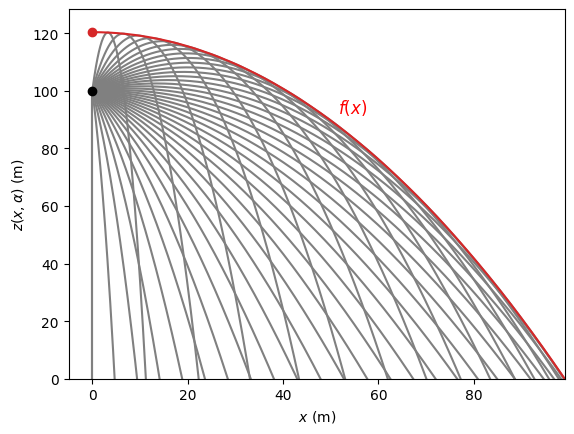

In [21]:
# Calculate Z_max
Z_max = z0 + v0**2 / (2*g)

# Define contour
def func(x):
    return Z_max - g*x**2/(2*v0**2)

# Plot points
ap = np.linspace(-np.pi/2, np.pi/2, 40)
xp = np.linspace(0, X_max, int(1e3))
zp = z_func(xp[:, np.newaxis], ap)

# Draw trajectories
plt.plot(xp, zp, color="grey")
plt.plot(0, z0, "o", color="black")

# Draw contour
fp = func(xp)
plt.plot(xp, fp, color="tab:red")
plt.plot(0, func(0), "o", color="tab:red")

# Texts
x_eps, z_eps = 2, 2
plt.text(X_max/2 + x_eps, func(X_max/2) + z_eps, s="$f(x)$", color="red", fontsize=12)

# Label
plt.xlabel(r"$x~(\mathrm{m})$")
plt.ylabel(r"$z(x,\alpha)~(\mathrm{m})$")

#Limits
plt.xlim(right=X_max)
plt.ylim(0, Z_max + 4*z_eps)
plt.show()

##### Finding the volume

With the curve $f(x)$ we can parametrize the volume that contains all the trajectories of the fragments. Let's call $\vec{\Phi}$ the points of the volume, which can be expressed as

$$\vec{\Phi} = \vec{\Phi}(r, \varphi, z) = (r\cos{\varphi}, r\sin{\varphi}, z)$$

where, 

$$
\begin{array}{c}
0 \leq r \leq R_{max},\text{ with  } R_{max} = X_{max} \\[5pt]
0 \leq \varphi \leq 2\pi \\[5pt]
0 \leq z \leq f(r), \text{ with } f(r) = Z_{max} - \frac{g}{2v_0^2}r^2
\end{array}
$$

We can now integrate the volume,

$$I = \int dV = 2\pi \int_0^{R_{max}} rf(r)~dr = \pi R^2_{max}\left(Z_{max} - \frac{g}{4v_0^2}R_{max}^2\right)$$

The value is:

In [22]:
R_max = X_max
I = np.pi * R_max**2 * (Z_max - g*R_max**2 / (4*v0**2))
print(f"Volume: V = {I:.4f}")

Volume: V = 1856532.8455


#### Figures

In [23]:
v0 = 20
z0 = 100
g = 9.81
X_max = 99.08284
Z_max = 120.387

plt.rcParams['text.usetex'] = True


##### Trajectory

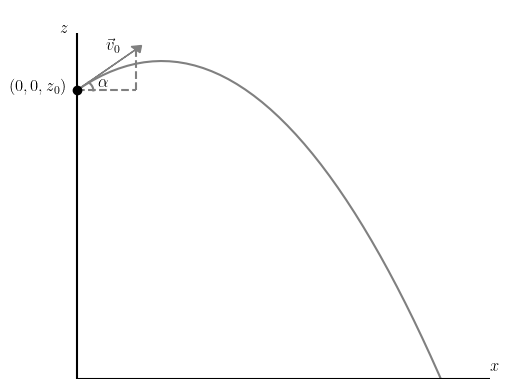

In [27]:
# A certain angle
a = np.pi/4

#Draw the trajectory
xp = np.linspace(0, X_max)
zp = z_func(xp, a)
plt.plot(xp, zp, color="grey")

# Draw the velocity vector
vector_length = 20
dx = vector_length * np.cos(a)
dz = vector_length * np.sin(a)
plt.arrow(0, z0, dx, dz, head_width=3, head_length=2, fc='grey', ec='grey')

# Draw horizontal and vertical axis
zlim = 120
plt.hlines(z0, xmin=0, xmax=dx, color="grey", linestyle="--")
plt.vlines(dx, ymin=z0, ymax=z0+dz, color="grey", linestyle="--")
plt.vlines(0, ymin=0, ymax=zlim, color="black")
plt.hlines(0, xmin=0, xmax=X_max, color="black")

#Draw initial point
plt.plot(0, z0, "o", color="black")


# Draw angle arc
r = 0.2*vector_length
ap = np.linspace(0, a, int(1e3))
plt.plot(r*np.cos(ap), z0 + r*np.sin(ap), color="grey")

# Texts
x_eps, z_eps = 2, 3
plt.text(X_max, z_eps, s="$x$", fontsize=12)
plt.text(-2*x_eps, zlim, s="$z$", fontsize=12)
plt.text(0+2.5*x_eps, z0+0.5*z_eps, s=r"$\alpha$", fontsize=12)
plt.text(0-8*x_eps, z0, s=r"$(0, 0, z_0)$", fontsize=12)
plt.text(dx-3.5*x_eps, z0+dz, s=r"$\vec{v}_0$", fontsize=12)

# Limits
plt.ylim(bottom=0)
plt.xlim(left=-15)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.xticks([])
plt.yticks([])

#Save image
plt.savefig("./figs/trajectory.svg", format="svg", bbox_inches="tight")

# Show fig
plt.show()



##### Trajectories

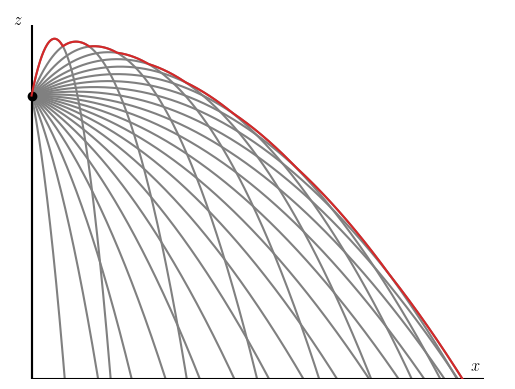

In [29]:
# Plot set of curves
a_val = np.linspace(-np.pi/2, np.pi/2, 25)
x = np.linspace(0, X_max, int(1e3))
set_curves = z0 + np.tan(a_val)*x[:, np.newaxis] - 0.5*g*(1 + np.tan(a_val)**2)*x[:, np.newaxis]**2 / v0**2
plt.plot(x, set_curves, color="grey")

# Draw initial point
plt.plot(0, z0, "o", color="black")
plt.ylim(top=Z_max+10, bottom=0)
plt.xlim(right=X_max+10)

# Draw horizontal and vertical axis
zlim = 125
plt.vlines(0, ymin=0, ymax=zlim, color="black")
plt.hlines(0, xmin=0, xmax=X_max+5, color="black")

# Draw surface delimiter
f = set_curves.max(axis=1)
plt.plot(x, f, color="tab:red")

# Texts
x_eps, z_eps = 2, 3
plt.text(X_max+x_eps, z_eps, s="$x$", fontsize=12)
plt.text(-2*x_eps, zlim, s="$z$", fontsize=12)


plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.xticks([])
plt.yticks([])

#Save image
plt.savefig("./figs/trajectories.svg", format="svg", bbox_inches="tight")
plt.show()

##### Contour

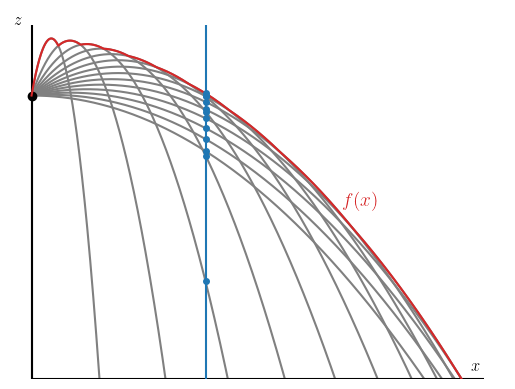

In [28]:
# Plot set of curves
a_val = np.linspace(0, np.pi/2, 15)
x = np.linspace(0, X_max, int(1e3))
set_curves = z0 + np.tan(a_val)*x[:, np.newaxis] - 0.5*g*(1 + np.tan(a_val)**2)*x[:, np.newaxis]**2 / v0**2
plt.plot(x, set_curves, color="grey")

# Draw initial point
plt.plot(0, z0, "o", color="black")
plt.ylim(top=Z_max+10, bottom=0)
plt.xlim(right=X_max+10)

# Draw horizontal and vertical axis
zlim = 125
plt.vlines(0, ymin=0, ymax=zlim, color="black")
plt.hlines(0, xmin=0, xmax=X_max+5, color="black")

# Draw surface delimiter
f = set_curves.max(axis=1)
plt.plot(x, f, color="tab:red")

# Vertical line
x_pos = 40
z_pos = z0 + np.tan(a_val)*x_pos - 0.5*g*(1 + np.tan(a_val)**2)*x_pos**2 / v0**2
plt.vlines(x_pos, 0, zlim, color="tab:blue")
plt.plot(np.ones(len(z_pos)) * x_pos, z_pos, "o", markersize=4)

# Texts
x_eps, z_eps = 2, 3
x_pos = x[int(7e2)]
z_pos = f[int(7e2)]
plt.text(X_max+x_eps, z_eps, s="$x$", fontsize=12)
plt.text(-2*x_eps, zlim, s="$z$", fontsize=12)
plt.text(x_pos+x_eps, z_pos, s="$f(x)$", color="tab:red", fontsize=14)



plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.xticks([])
plt.yticks([])

#Save image
plt.savefig("./figs/contour.svg", format="svg", bbox_inches="tight")
plt.show()